In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn/pppc')
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn')
import numpy as np
import torch
import matplotlib.pyplot as plt

import pppc
from pppc.configs import PtychoNNTrainingConfigDict
from pppc.ptychonn.trainer import PtychoNNTrainer, PtychoNNHyperparameterScanner
from pppc.ptychonn.dataset_handle import HDF5Dataset
from pppc.ptychonn.model import PtychoNNModel, PtychoNNPhaseOnlyModel

[2023-11-25 11:47:19,779] Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2023-11-25 11:47:19,782] NumExpr defaulting to 8 threads.


Create a baseline config dict. 

In [3]:
base_config_dict = PtychoNNTrainingConfigDict()
base_config_dict['batch_size_per_process'] = 64
base_config_dict['num_epochs'] = 60
base_config_dict['learning_rate_per_process'] = 1e-3
base_config_dict['optimizer'] = 'adam'
base_config_dict['model_save_dir'] = '../../trained_models/model_36SpiralDatasets_2ndTrainingRun'
base_config_dict['validation_ratio'] = 0.01
dataset = HDF5Dataset('data/data_train.h5', verbose=False)
base_config_dict['dataset'] = dataset
base_config_dict['model'] = None
base_config_dict['debug'] = False

In [4]:
param_scan_dict = {
    'model': [(PtychoNNPhaseOnlyModel, {}), (PtychoNNModel, {'n_levels': 3}), (PtychoNNModel, {'n_levels': 4}), ],
    'batch_size_per_process': [64, 32],
    'learning_rate_per_process': [1e-3, 1e-4]
}

In [6]:
scanner = PtychoNNHyperparameterScanner(param_scan_dict, base_config_dict)
scanner.build()
scanner.keep_models_in_memory = True

In [7]:
scanner.result_table

model  batch_size_per_process  \
0    PtychoNNPhaseOnlyModel                      64   
1    PtychoNNPhaseOnlyModel                      64   
2    PtychoNNPhaseOnlyModel                      32   
3    PtychoNNPhaseOnlyModel                      32   
4   PtychoNNModel_nLevels_3                      64   
5   PtychoNNModel_nLevels_3                      64   
6   PtychoNNModel_nLevels_3                      32   
7   PtychoNNModel_nLevels_3                      32   
8   PtychoNNModel_nLevels_4                      64   
9   PtychoNNModel_nLevels_4                      64   
10  PtychoNNModel_nLevels_4                      32   
11  PtychoNNModel_nLevels_4                      32   

    learning_rate_per_process  min_val_loss_total  min_val_loss_mag  \
0                      0.0010                 0.0               0.0   
1                      0.0001                 0.0               0.0   
2                      0.0010                 0.0               0.0   
3                      0.0001                 0.0               0.0   
4                      0.0010                 0.0               0.0   
5                      0.0001                 0.0               0.0   
6                      0.0010                 0.0               0.0   
7                      0.0001                 0.0               0.0   
8                      0.0010                 0.0               0.0   
9                      0.0001                 0.0               0.0   
10                     0.0010                 0.0               0.0   
11                     0.0001                 0.0               0.0   

    min_val_loss_phase  epoch_min_val_loss  
0                  0.0                 0.0  
1                  0.0                 0.0  
2                  0.0                 0.0  
3                  0.0                 0.0  
4                  0.0                 0.0  
5                  0.0                 0.0  
6                  0.0                 0.0  
7                  0.0                 0.0  
8                  0.0                 0.0  
9                  0.0                 0.0  
10                 0.0                 0.0  
11                 0.0                 0.0

In [8]:
scanner.run()
scanner.result_table

  0%|                                                                                                                                                                                                                                                    | 0/12 [00:00<?, ?it/s][2023-11-25 11:48:22,547] Using DataParallel with 2 devices.
[2023-11-25 11:52:30,718] Saving improved model after Val Loss improved from inf to 0.56405
[2023-11-25 11:56:31,711] Saving improved model after Val Loss improved from 0.56405 to 0.52012
  8%|███████████████████                                                                                                                                                                                                                 | 1/12 [3:59:43<43:57:01, 14383.78s/it][2023-11-25 15:48:06,159] Using DataParallel with 2 devices.


Device 0 memory info:
    8080.375 MB total
    1464.0 MB reserved
    11.21533203125 MB allocated


[2023-11-25 15:52:06,861] Saving improved model after Val Loss improved from inf to 0.58048
[2023-11-25 15:56:29,895] Saving improved model after Val Loss improved from 0.58048 to 0.57518
[2023-11-25 16:00:58,078] Saving improved model after Val Loss improved from 0.57518 to 0.47885
[2023-11-25 16:05:04,327] Saving improved model after Val Loss improved from 0.47885 to 0.36638
[2023-11-25 16:09:32,366] Saving improved model after Val Loss improved from 0.36638 to 0.29958
[2023-11-25 16:14:00,818] Saving improved model after Val Loss improved from 0.29958 to 0.27355
[2023-11-25 16:18:30,880] Saving improved model after Val Loss improved from 0.27355 to 0.26887
[2023-11-25 16:23:00,813] Saving improved model after Val Loss improved from 0.26887 to 0.24740
[2023-11-25 16:27:30,731] Saving improved model after Val Loss improved from 0.24740 to 0.23968
[2023-11-25 16:31:42,325] Saving improved model after Val Loss improved from 0.23968 to 0.23285
[2023-11-25 16:35:56,573] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    1480.0 MB reserved
    22.4306640625 MB allocated


[2023-11-25 19:56:02,470] Saving improved model after Val Loss improved from inf to 0.55680
[2023-11-25 20:00:25,939] Saving improved model after Val Loss improved from 0.55680 to 0.32329
[2023-11-25 20:05:10,322] Saving improved model after Val Loss improved from 0.32329 to 0.27161
[2023-11-25 20:09:33,598] Saving improved model after Val Loss improved from 0.27161 to 0.22973
[2023-11-25 20:22:48,465] Saving improved model after Val Loss improved from 0.22973 to 0.21958
[2023-11-25 20:27:11,998] Saving improved model after Val Loss improved from 0.21958 to 0.19711
[2023-11-25 20:31:34,668] Saving improved model after Val Loss improved from 0.19711 to 0.19066
[2023-11-25 20:36:00,859] Saving improved model after Val Loss improved from 0.19066 to 0.18435
[2023-11-25 20:40:26,101] Saving improved model after Val Loss improved from 0.18435 to 0.17620
[2023-11-25 20:44:51,527] Saving improved model after Val Loss improved from 0.17620 to 0.17051
[2023-11-25 21:29:22,167] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    786.0 MB reserved
    33.64599609375 MB allocated


[2023-11-26 00:22:48,324] Saving improved model after Val Loss improved from inf to 0.57434
[2023-11-26 00:27:23,273] Saving improved model after Val Loss improved from 0.57434 to 0.54137
[2023-11-26 00:32:01,804] Saving improved model after Val Loss improved from 0.54137 to 0.36662
[2023-11-26 00:36:26,667] Saving improved model after Val Loss improved from 0.36662 to 0.31062
[2023-11-26 00:40:53,995] Saving improved model after Val Loss improved from 0.31062 to 0.29737
[2023-11-26 00:45:17,470] Saving improved model after Val Loss improved from 0.29737 to 0.26572
[2023-11-26 00:49:52,768] Saving improved model after Val Loss improved from 0.26572 to 0.24182
[2023-11-26 00:54:18,536] Saving improved model after Val Loss improved from 0.24182 to 0.23452
[2023-11-26 01:03:07,076] Saving improved model after Val Loss improved from 0.23452 to 0.22899
[2023-11-26 01:07:32,805] Saving improved model after Val Loss improved from 0.22899 to 0.21953
[2023-11-26 01:11:56,000] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    794.0 MB reserved
    44.861328125 MB allocated


[2023-11-26 04:51:19,879] Saving improved model after Val Loss improved from inf to 0.58939
[2023-11-26 04:55:40,832] Saving improved model after Val Loss improved from 0.58939 to 0.47160
[2023-11-26 05:00:00,282] Saving improved model after Val Loss improved from 0.47160 to 0.44788
[2023-11-26 05:04:19,782] Saving improved model after Val Loss improved from 0.44788 to 0.43494
[2023-11-26 05:08:40,198] Saving improved model after Val Loss improved from 0.43494 to 0.42149
[2023-11-26 05:12:59,697] Saving improved model after Val Loss improved from 0.42149 to 0.41342
[2023-11-26 05:17:18,624] Saving improved model after Val Loss improved from 0.41342 to 0.40524
[2023-11-26 05:21:39,031] Saving improved model after Val Loss improved from 0.40524 to 0.39468
[2023-11-26 05:25:58,860] Saving improved model after Val Loss improved from 0.39468 to 0.38824
[2023-11-26 05:30:17,136] Saving improved model after Val Loss improved from 0.38824 to 0.38370
[2023-11-26 05:34:35,558] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4544.0 MB reserved
    63.9052734375 MB allocated


[2023-11-26 09:09:53,250] Saving improved model after Val Loss improved from inf to 0.60780
[2023-11-26 09:14:12,469] Saving improved model after Val Loss improved from 0.60780 to 0.55033
[2023-11-26 09:18:31,657] Saving improved model after Val Loss improved from 0.55033 to 0.48101
[2023-11-26 09:22:50,469] Saving improved model after Val Loss improved from 0.48101 to 0.45552
[2023-11-26 09:27:14,575] Saving improved model after Val Loss improved from 0.45552 to 0.43554
[2023-11-26 09:31:35,978] Saving improved model after Val Loss improved from 0.43554 to 0.41719
[2023-11-26 09:35:56,523] Saving improved model after Val Loss improved from 0.41719 to 0.40704
[2023-11-26 09:40:16,061] Saving improved model after Val Loss improved from 0.40704 to 0.39446
[2023-11-26 09:44:34,604] Saving improved model after Val Loss improved from 0.39446 to 0.38841
[2023-11-26 09:48:54,043] Saving improved model after Val Loss improved from 0.38841 to 0.38223
[2023-11-26 09:53:19,072] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4578.0 MB reserved
    82.94921875 MB allocated


[2023-11-26 13:30:30,315] Saving improved model after Val Loss improved from inf to 0.45112
[2023-11-26 13:35:10,340] Saving improved model after Val Loss improved from 0.45112 to 0.38369
[2023-11-26 13:39:50,821] Saving improved model after Val Loss improved from 0.38369 to 0.37195
[2023-11-26 13:49:20,389] Saving improved model after Val Loss improved from 0.37195 to 0.35409
[2023-11-26 13:54:04,746] Saving improved model after Val Loss improved from 0.35409 to 0.34465
[2023-11-26 13:58:47,685] Saving improved model after Val Loss improved from 0.34465 to 0.33669
[2023-11-26 14:03:26,782] Saving improved model after Val Loss improved from 0.33669 to 0.32916
[2023-11-26 14:08:13,253] Saving improved model after Val Loss improved from 0.32916 to 0.32329
[2023-11-26 14:13:08,436] Saving improved model after Val Loss improved from 0.32329 to 0.31294
[2023-11-26 14:17:49,761] Saving improved model after Val Loss improved from 0.31294 to 0.30760
[2023-11-26 14:22:29,844] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2204.0 MB reserved
    101.9931640625 MB allocated


[2023-11-26 18:17:28,187] Saving improved model after Val Loss improved from inf to 0.61182
[2023-11-26 18:22:10,129] Saving improved model after Val Loss improved from 0.61182 to 0.48591
[2023-11-26 18:27:01,754] Saving improved model after Val Loss improved from 0.48591 to 0.45099
[2023-11-26 18:31:45,689] Saving improved model after Val Loss improved from 0.45099 to 0.44197
[2023-11-26 18:36:28,013] Saving improved model after Val Loss improved from 0.44197 to 0.42106
[2023-11-26 18:41:13,236] Saving improved model after Val Loss improved from 0.42106 to 0.40153
[2023-11-26 18:45:54,682] Saving improved model after Val Loss improved from 0.40153 to 0.38941
[2023-11-26 18:50:41,806] Saving improved model after Val Loss improved from 0.38941 to 0.38138
[2023-11-26 18:55:20,263] Saving improved model after Val Loss improved from 0.38138 to 0.37421
[2023-11-26 18:59:58,885] Saving improved model after Val Loss improved from 0.37421 to 0.36290
[2023-11-26 19:04:42,920] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2222.0 MB reserved
    121.037109375 MB allocated


[2023-11-26 22:58:51,435] Saving improved model after Val Loss improved from inf to 0.62267
[2023-11-26 23:03:22,000] Saving improved model after Val Loss improved from 0.62267 to 0.35645
[2023-11-26 23:07:51,168] Saving improved model after Val Loss improved from 0.35645 to 0.28259
[2023-11-26 23:12:20,859] Saving improved model after Val Loss improved from 0.28259 to 0.24378
[2023-11-26 23:16:51,331] Saving improved model after Val Loss improved from 0.24378 to 0.22504
[2023-11-26 23:21:24,066] Saving improved model after Val Loss improved from 0.22504 to 0.22385
[2023-11-26 23:25:53,922] Saving improved model after Val Loss improved from 0.22385 to 0.21008
[2023-11-26 23:30:23,767] Saving improved model after Val Loss improved from 0.21008 to 0.20041
[2023-11-26 23:34:54,362] Saving improved model after Val Loss improved from 0.20041 to 0.19060
[2023-11-26 23:39:23,172] Saving improved model after Val Loss improved from 0.19060 to 0.18135
[2023-11-26 23:43:51,992] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4856.0 MB reserved
    198.9951171875 MB allocated


[2023-11-27 03:28:41,134] Saving improved model after Val Loss improved from inf to 0.64336
[2023-11-27 03:33:11,234] Saving improved model after Val Loss improved from 0.64336 to 0.48740
[2023-11-27 03:37:43,202] Saving improved model after Val Loss improved from 0.48740 to 0.34980
[2023-11-27 03:42:18,529] Saving improved model after Val Loss improved from 0.34980 to 0.29937
[2023-11-27 03:46:49,636] Saving improved model after Val Loss improved from 0.29937 to 0.28425
[2023-11-27 03:51:20,331] Saving improved model after Val Loss improved from 0.28425 to 0.25343
[2023-11-27 03:55:49,907] Saving improved model after Val Loss improved from 0.25343 to 0.23961
[2023-11-27 04:00:21,796] Saving improved model after Val Loss improved from 0.23961 to 0.23681
[2023-11-27 04:04:51,769] Saving improved model after Val Loss improved from 0.23681 to 0.22863
[2023-11-27 04:09:21,233] Saving improved model after Val Loss improved from 0.22863 to 0.21684
[2023-11-27 04:13:52,432] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4906.0 MB reserved
    273.35595703125 MB allocated


[2023-11-27 08:00:32,252] Saving improved model after Val Loss improved from inf to 0.61457
[2023-11-27 08:05:24,388] Saving improved model after Val Loss improved from 0.61457 to 0.35765
[2023-11-27 08:10:17,584] Saving improved model after Val Loss improved from 0.35765 to 0.30683
[2023-11-27 08:15:15,875] Saving improved model after Val Loss improved from 0.30683 to 0.30168
[2023-11-27 08:20:08,900] Saving improved model after Val Loss improved from 0.30168 to 0.28220
[2023-11-27 08:25:04,717] Saving improved model after Val Loss improved from 0.28220 to 0.27811
[2023-11-27 08:29:59,234] Saving improved model after Val Loss improved from 0.27811 to 0.26894
[2023-11-27 08:34:51,949] Saving improved model after Val Loss improved from 0.26894 to 0.25317
[2023-11-27 08:44:38,626] Saving improved model after Val Loss improved from 0.25317 to 0.24695
[2023-11-27 08:49:32,772] Saving improved model after Val Loss improved from 0.24695 to 0.23311
[2023-11-27 08:54:26,355] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2514.0 MB reserved
    348.7568359375 MB allocated


[2023-11-27 13:19:51,734] Saving improved model after Val Loss improved from inf to 0.57429
[2023-11-27 13:24:59,996] Saving improved model after Val Loss improved from 0.57429 to 0.35443
[2023-11-27 13:29:59,515] Saving improved model after Val Loss improved from 0.35443 to 0.29844
[2023-11-27 13:35:05,719] Saving improved model after Val Loss improved from 0.29844 to 0.28151
[2023-11-27 13:40:22,677] Saving improved model after Val Loss improved from 0.28151 to 0.25457
[2023-11-27 13:50:28,056] Saving improved model after Val Loss improved from 0.25457 to 0.23786
[2023-11-27 13:55:30,103] Saving improved model after Val Loss improved from 0.23786 to 0.22649
[2023-11-27 14:00:26,290] Saving improved model after Val Loss improved from 0.22649 to 0.21964
[2023-11-27 14:05:20,392] Saving improved model after Val Loss improved from 0.21964 to 0.20845
[2023-11-27 14:10:21,149] Saving improved model after Val Loss improved from 0.20845 to 0.20658
[2023-11-27 14:15:17,138] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2596.0 MB reserved
    424.57373046875 MB allocated


model  batch_size_per_process  \
0    PtychoNNPhaseOnlyModel                      64   
1    PtychoNNPhaseOnlyModel                      64   
2    PtychoNNPhaseOnlyModel                      32   
3    PtychoNNPhaseOnlyModel                      32   
4   PtychoNNModel_nLevels_3                      64   
5   PtychoNNModel_nLevels_3                      64   
6   PtychoNNModel_nLevels_3                      32   
7   PtychoNNModel_nLevels_3                      32   
8   PtychoNNModel_nLevels_4                      64   
9   PtychoNNModel_nLevels_4                      64   
10  PtychoNNModel_nLevels_4                      32   
11  PtychoNNModel_nLevels_4                      32   

    learning_rate_per_process  min_val_loss_total  min_val_loss_mag  \
0                      0.0010            0.520122          0.000000   
1                      0.0001            0.194801          0.000000   
2                      0.0010            0.159438          0.000000   
3                      0.0001            0.184519          0.000000   
4                      0.0010            0.353631          0.075970   
5                      0.0001            0.339804          0.018648   
6                      0.0010            0.278894          0.013709   
7                      0.0001            0.324122          0.016056   
8                      0.0010            0.161955          0.013391   
9                      0.0001            0.180364          0.015005   
10                     0.0010            0.221939          0.075453   
11                     0.0001            0.180745          0.017167   

    min_val_loss_phase  epoch_min_val_loss  
0             0.520122                 1.0  
1             0.194801                59.0  
2             0.159438                46.0  
3             0.184519                59.0  
4             0.277661                51.0  
5             0.321156                57.0  
6             0.265185                35.0  
7             0.308066                59.0  
8             0.148564                36.0  
9             0.165359                59.0  
10            0.146487                23.0  
11            0.163578                47.0

[autoreload of reconstructor failed: Traceback (most recent call last):
  File "/home/beams/MINGDU/anaconda3/envs/ptychonn/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/beams/MINGDU/anaconda3/envs/ptychonn/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/beams/MINGDU/anaconda3/envs/ptychonn/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/beams/MINGDU/anaconda3/envs/ptychonn/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/beams/MINGDU/anaconda3/envs/ptychonn/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/beams/MINGDU/ana

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                     0.001
min_val_loss_total                         0.520122
min_val_loss_mag                                0.0
min_val_loss_phase                         0.520122
epoch_min_val_loss                              1.0
Name: 0, dtype: object


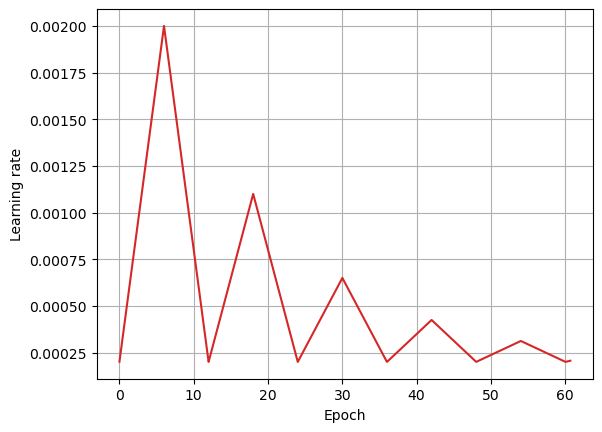

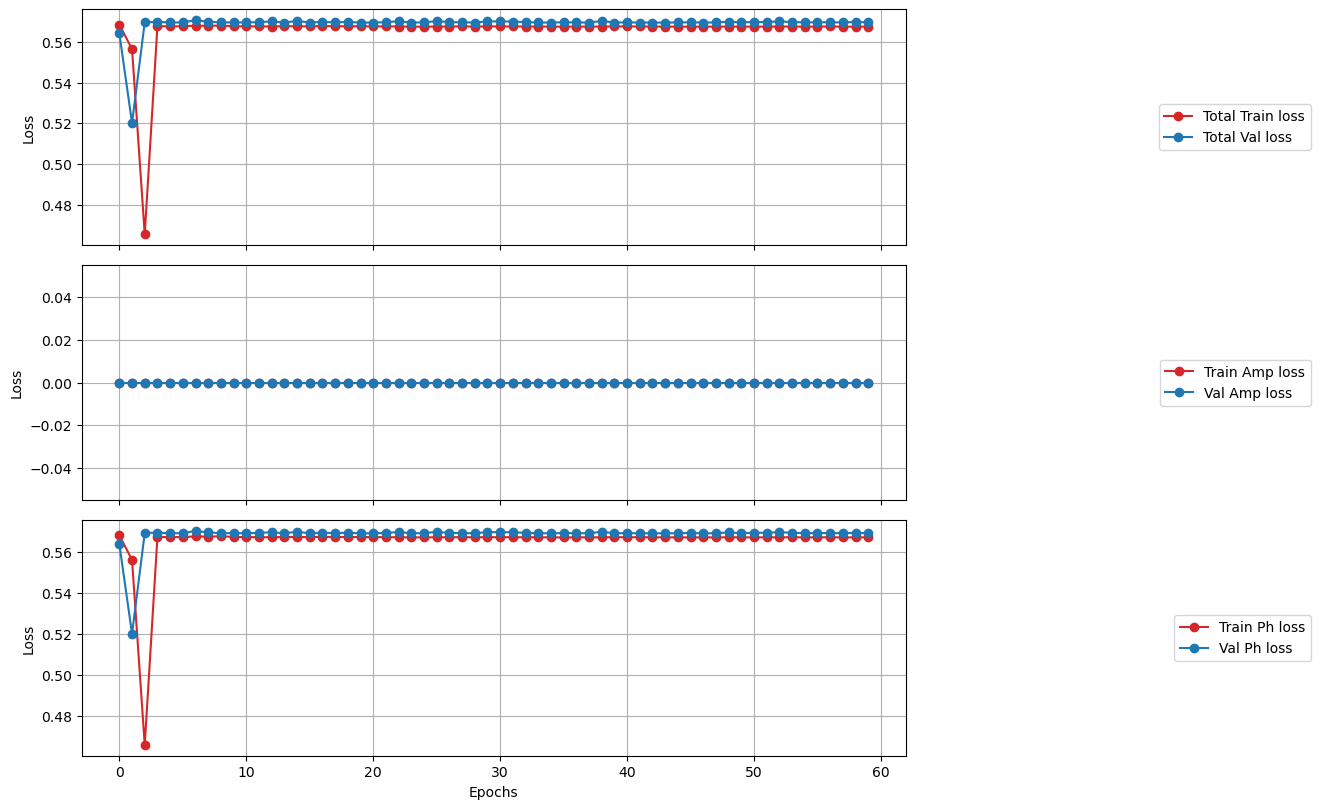

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                    0.0001
min_val_loss_total                         0.194801
min_val_loss_mag                                0.0
min_val_loss_phase                         0.194801
epoch_min_val_loss                             59.0
Name: 1, dtype: object


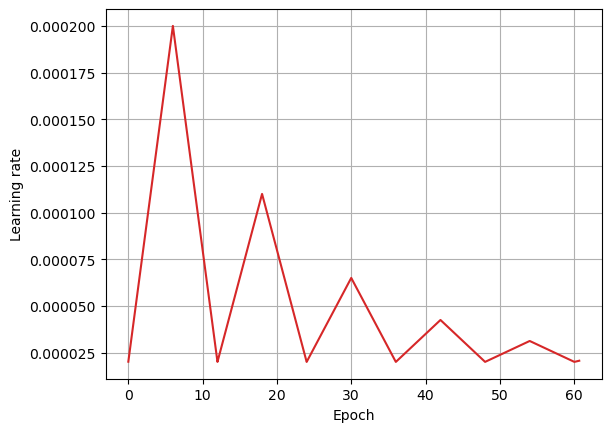

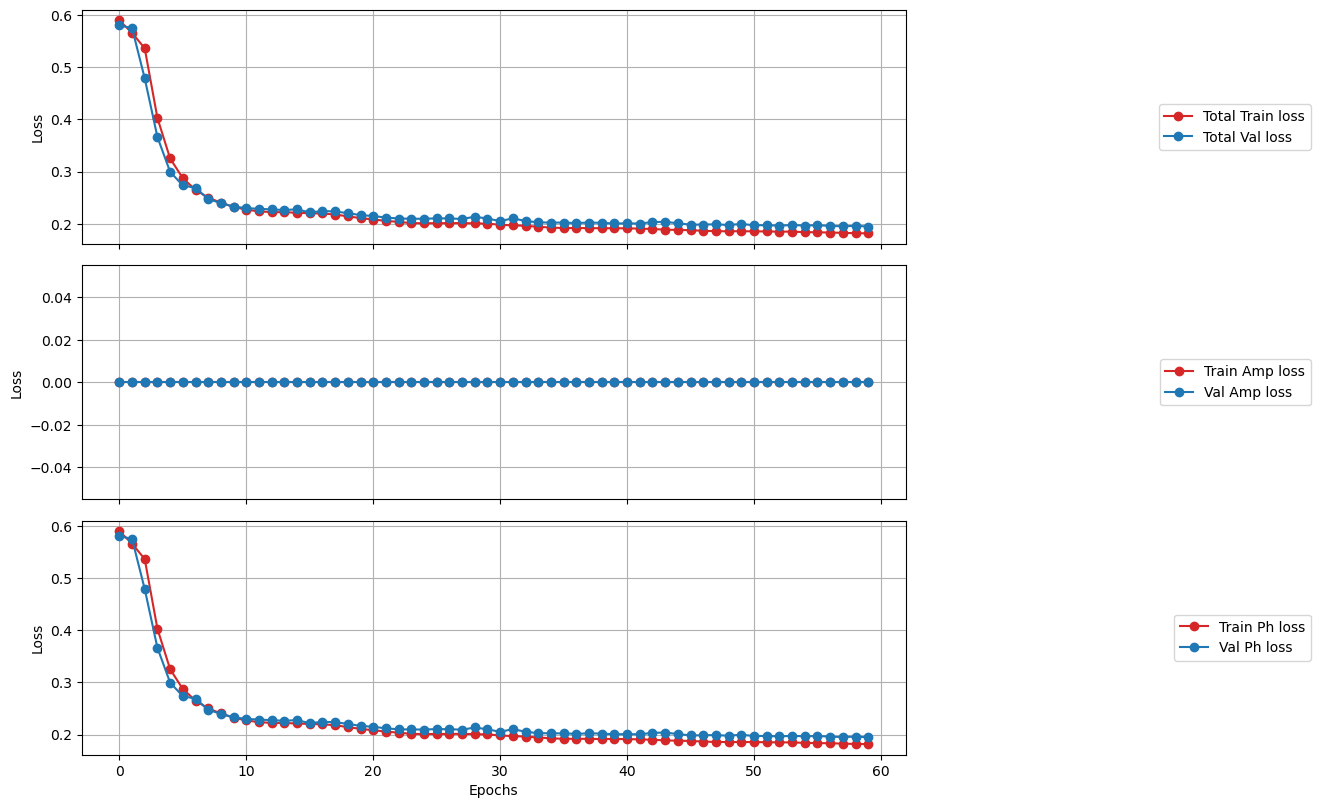

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                     0.001
min_val_loss_total                         0.159438
min_val_loss_mag                                0.0
min_val_loss_phase                         0.159438
epoch_min_val_loss                             46.0
Name: 2, dtype: object


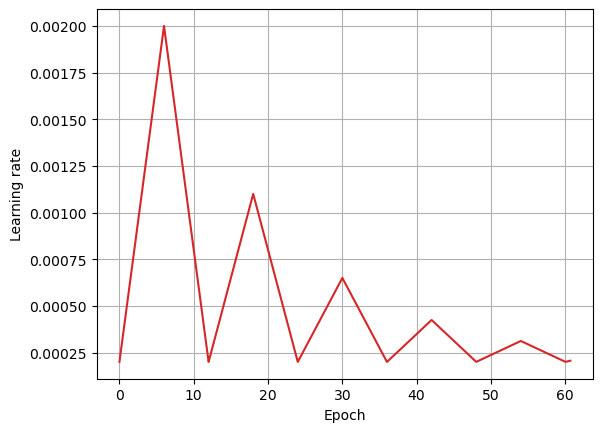

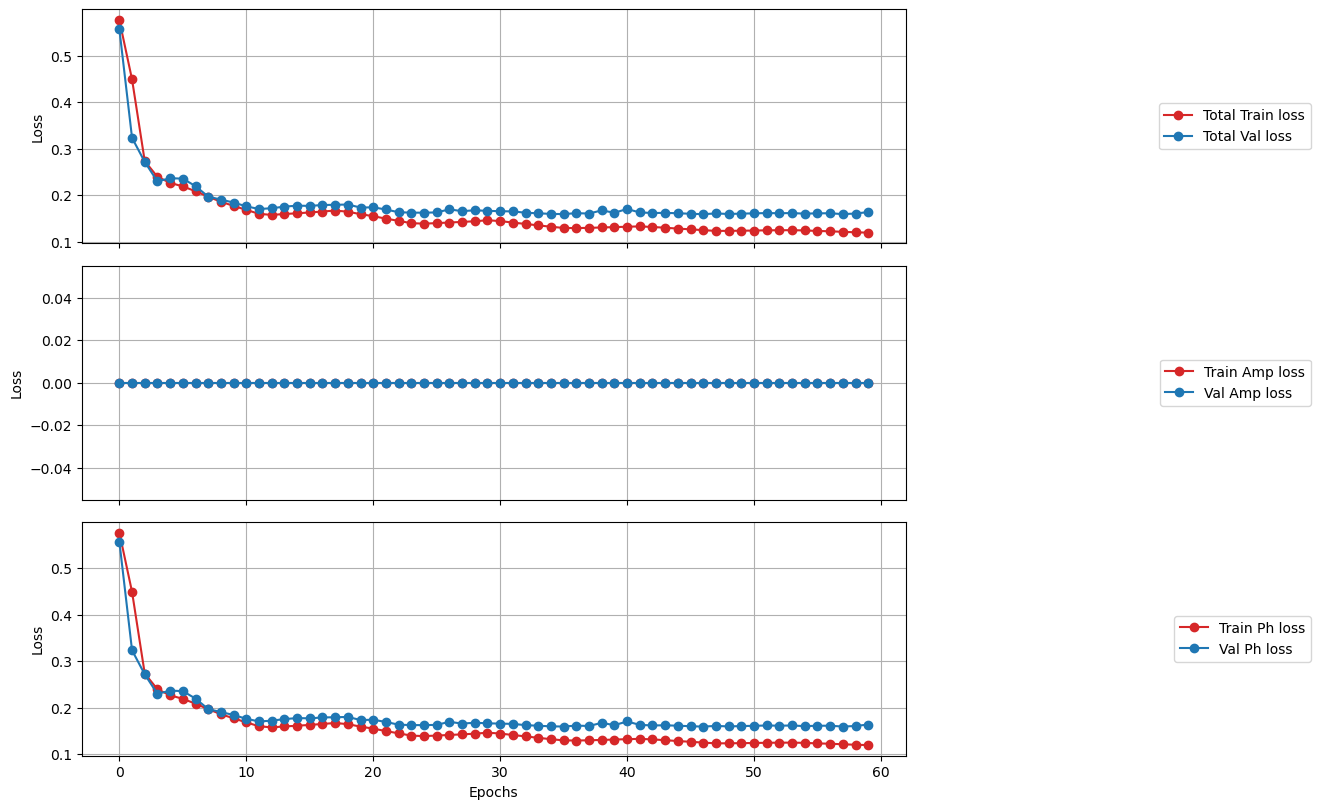

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                    0.0001
min_val_loss_total                         0.184519
min_val_loss_mag                                0.0
min_val_loss_phase                         0.184519
epoch_min_val_loss                             59.0
Name: 3, dtype: object


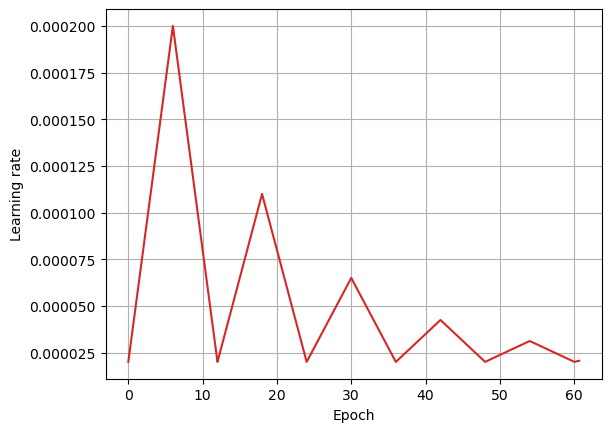

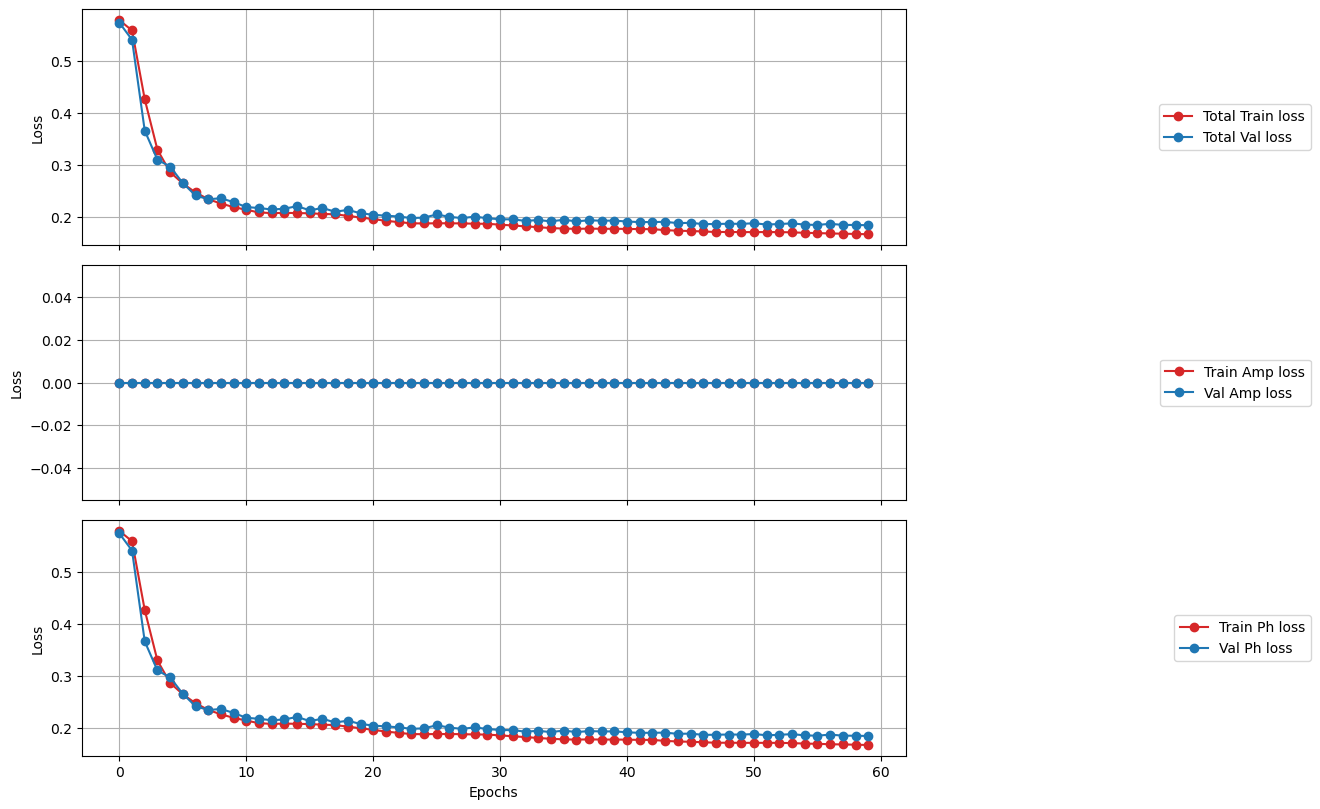

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.353631
min_val_loss_mag                             0.07597
min_val_loss_phase                          0.277661
epoch_min_val_loss                              51.0
Name: 4, dtype: object


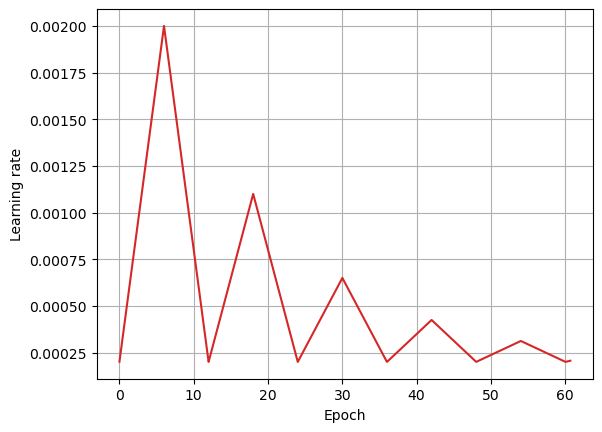

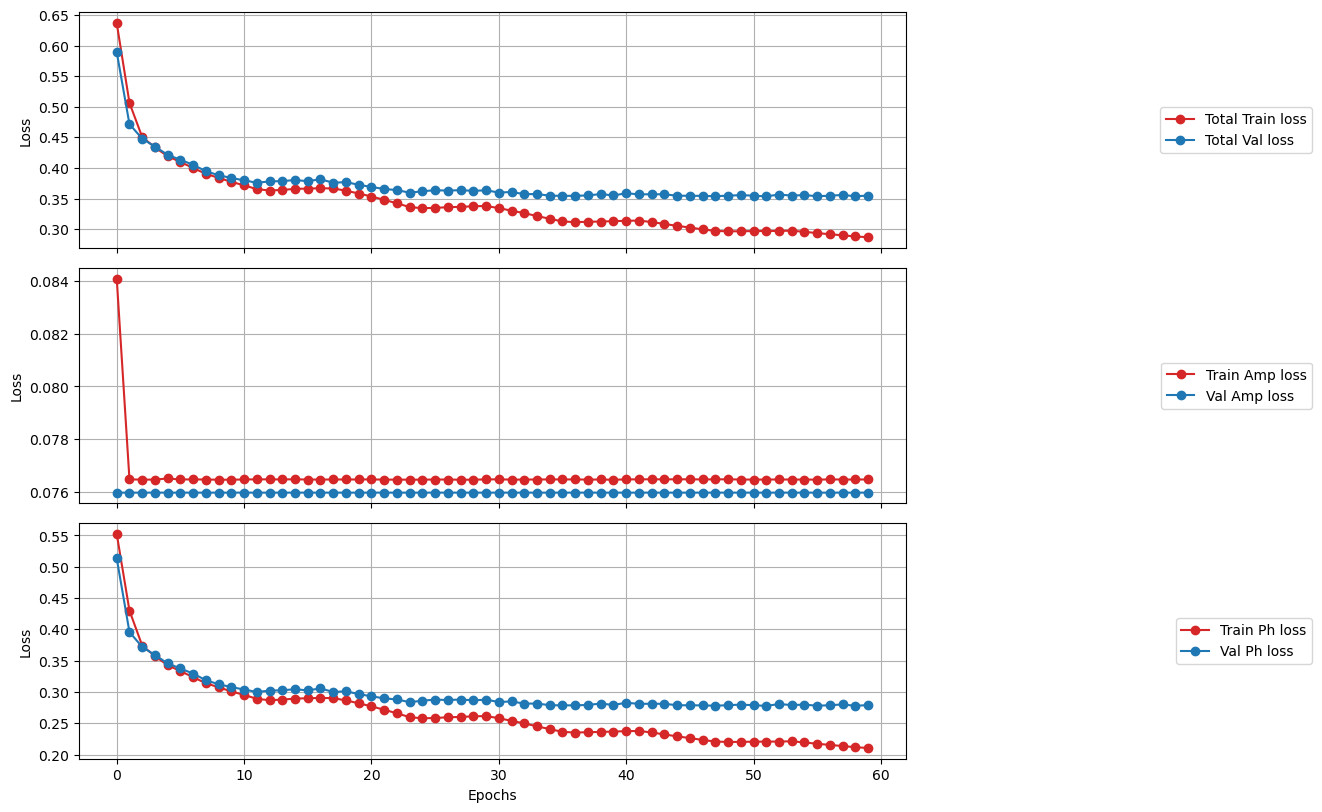

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.339804
min_val_loss_mag                            0.018648
min_val_loss_phase                          0.321156
epoch_min_val_loss                              57.0
Name: 5, dtype: object


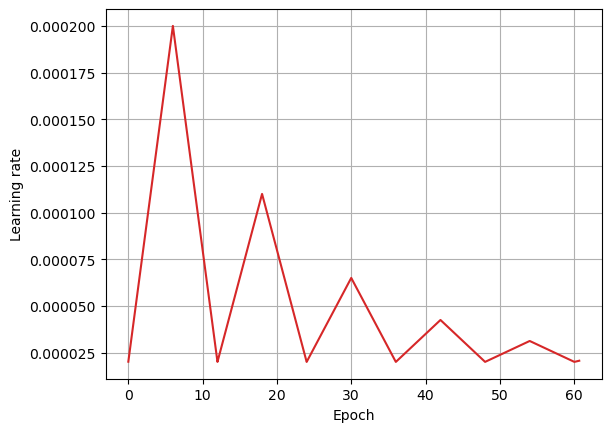

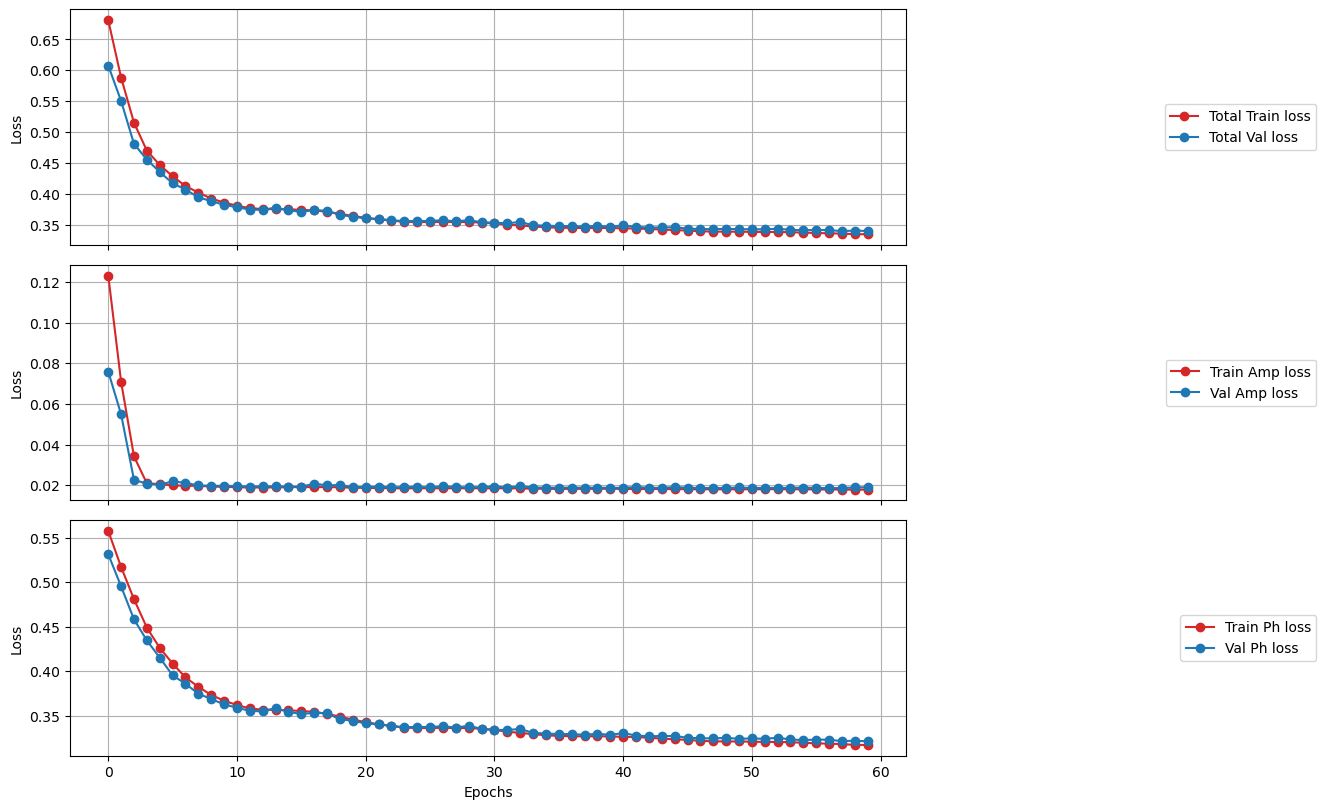

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                          0.278894
min_val_loss_mag                            0.013709
min_val_loss_phase                          0.265185
epoch_min_val_loss                              35.0
Name: 6, dtype: object


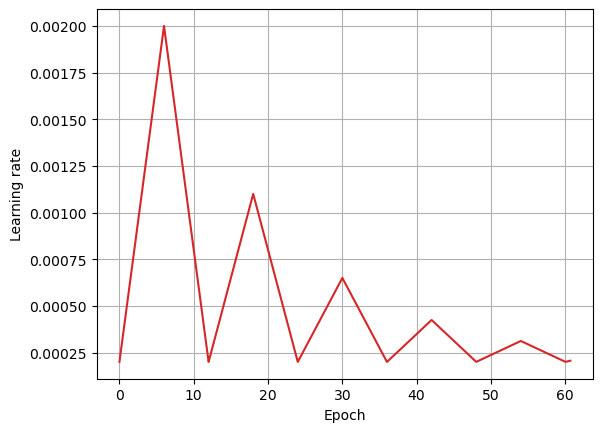

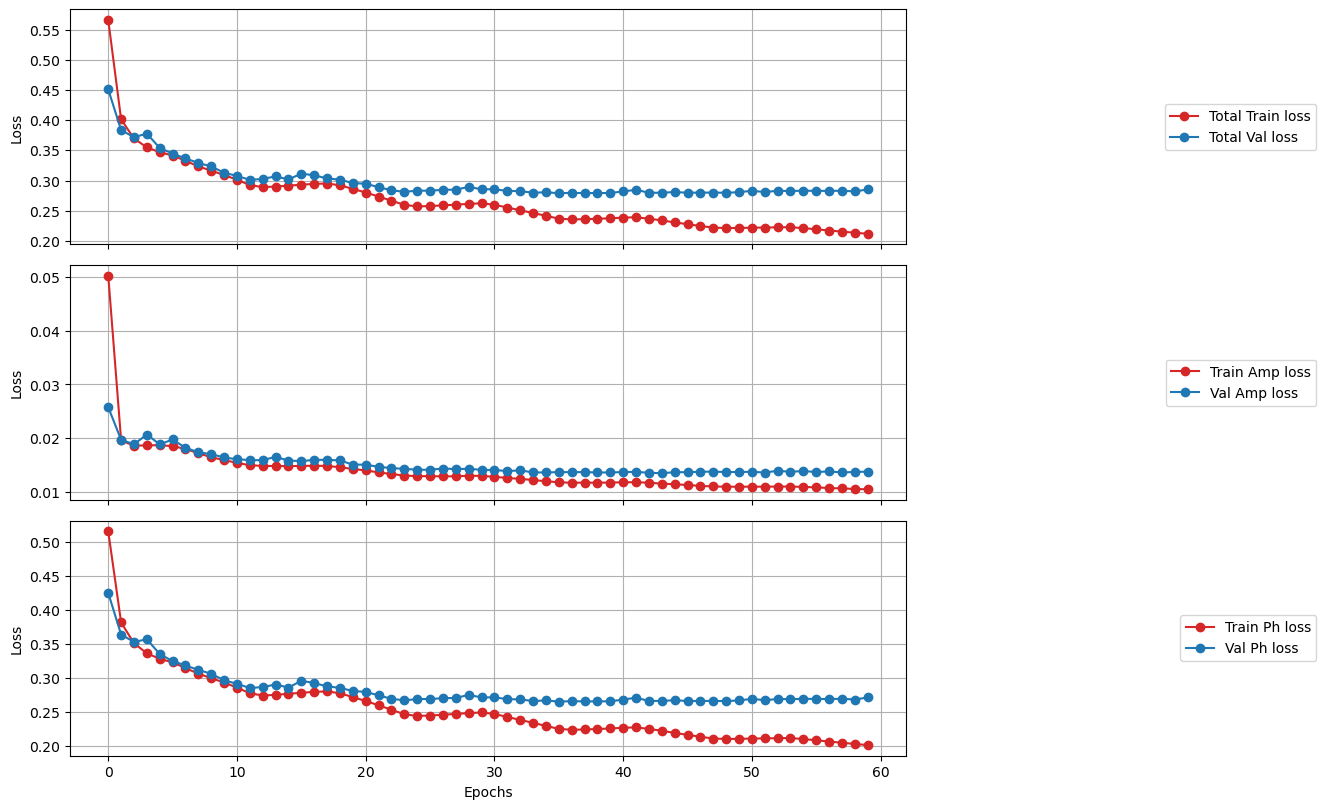

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.324122
min_val_loss_mag                            0.016056
min_val_loss_phase                          0.308066
epoch_min_val_loss                              59.0
Name: 7, dtype: object


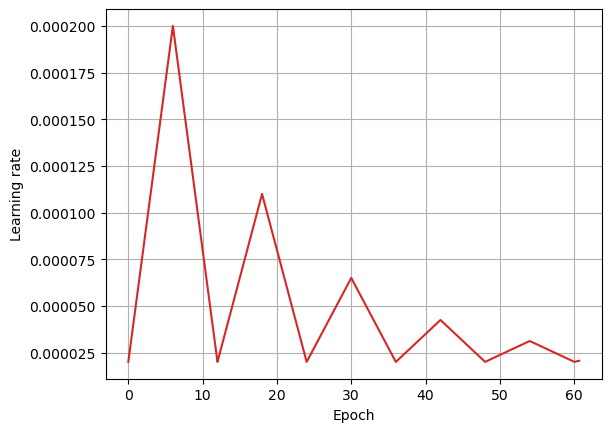

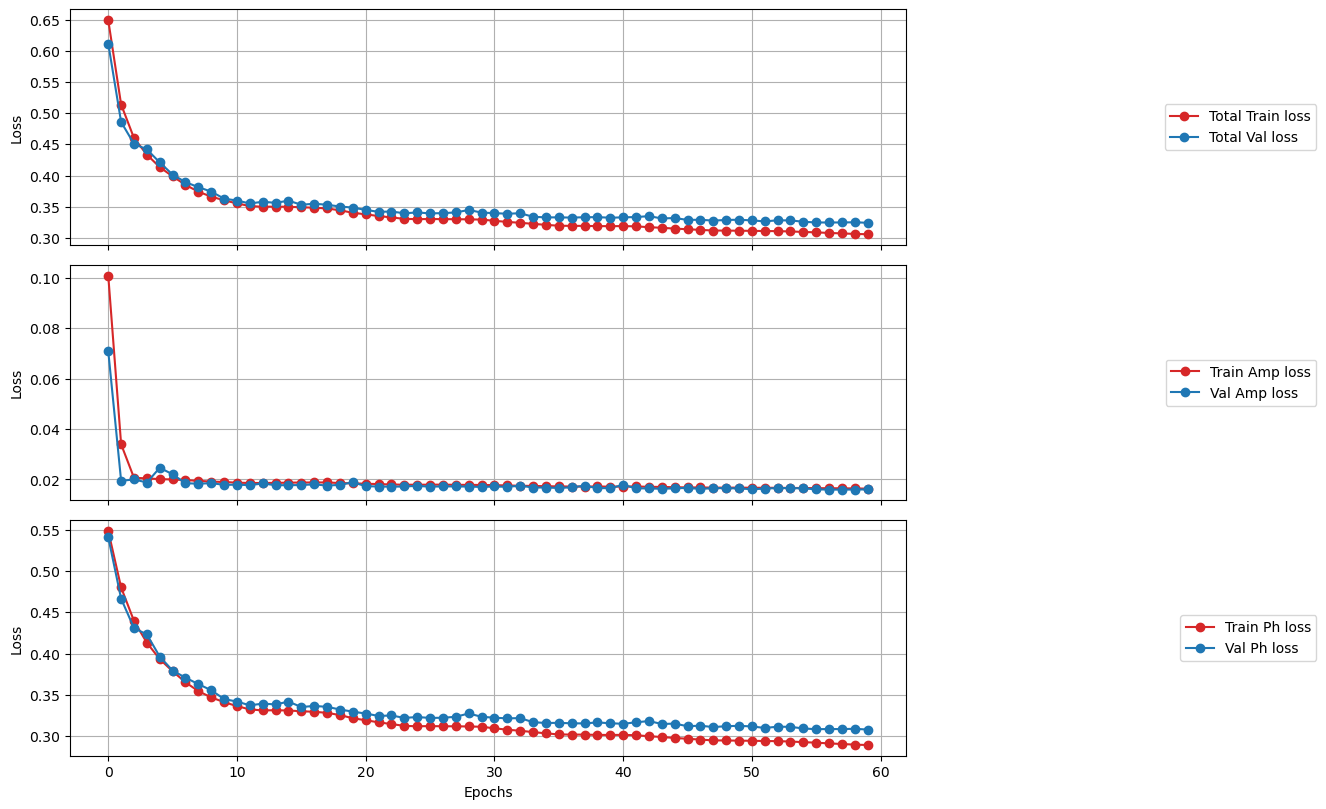

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.161955
min_val_loss_mag                            0.013391
min_val_loss_phase                          0.148564
epoch_min_val_loss                              36.0
Name: 8, dtype: object


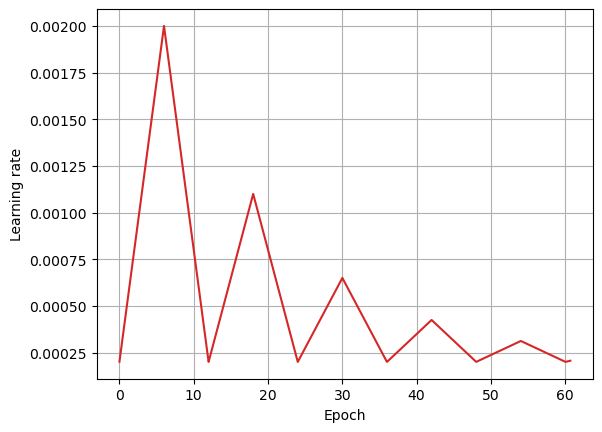

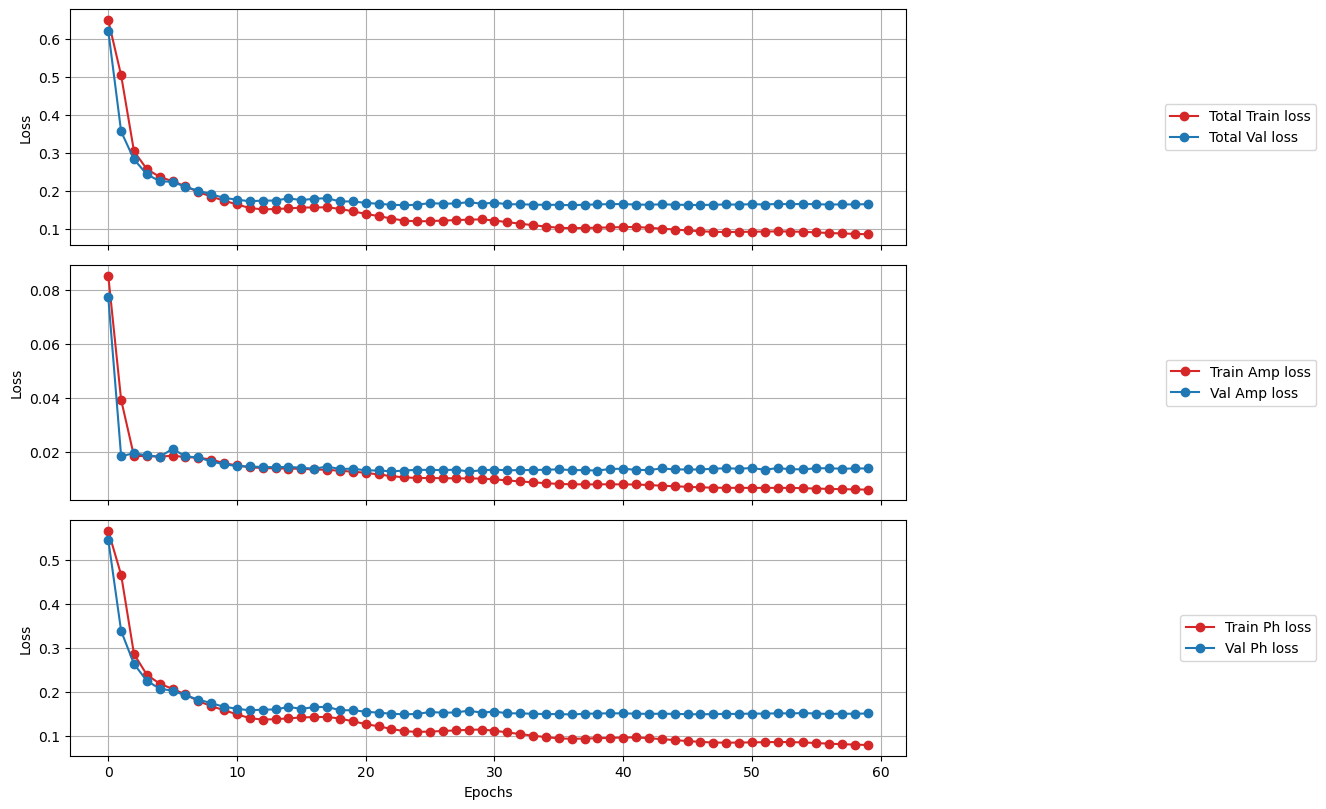

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.180364
min_val_loss_mag                            0.015005
min_val_loss_phase                          0.165359
epoch_min_val_loss                              59.0
Name: 9, dtype: object


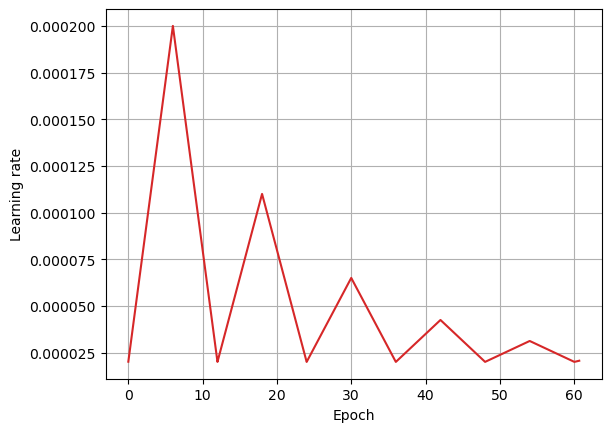

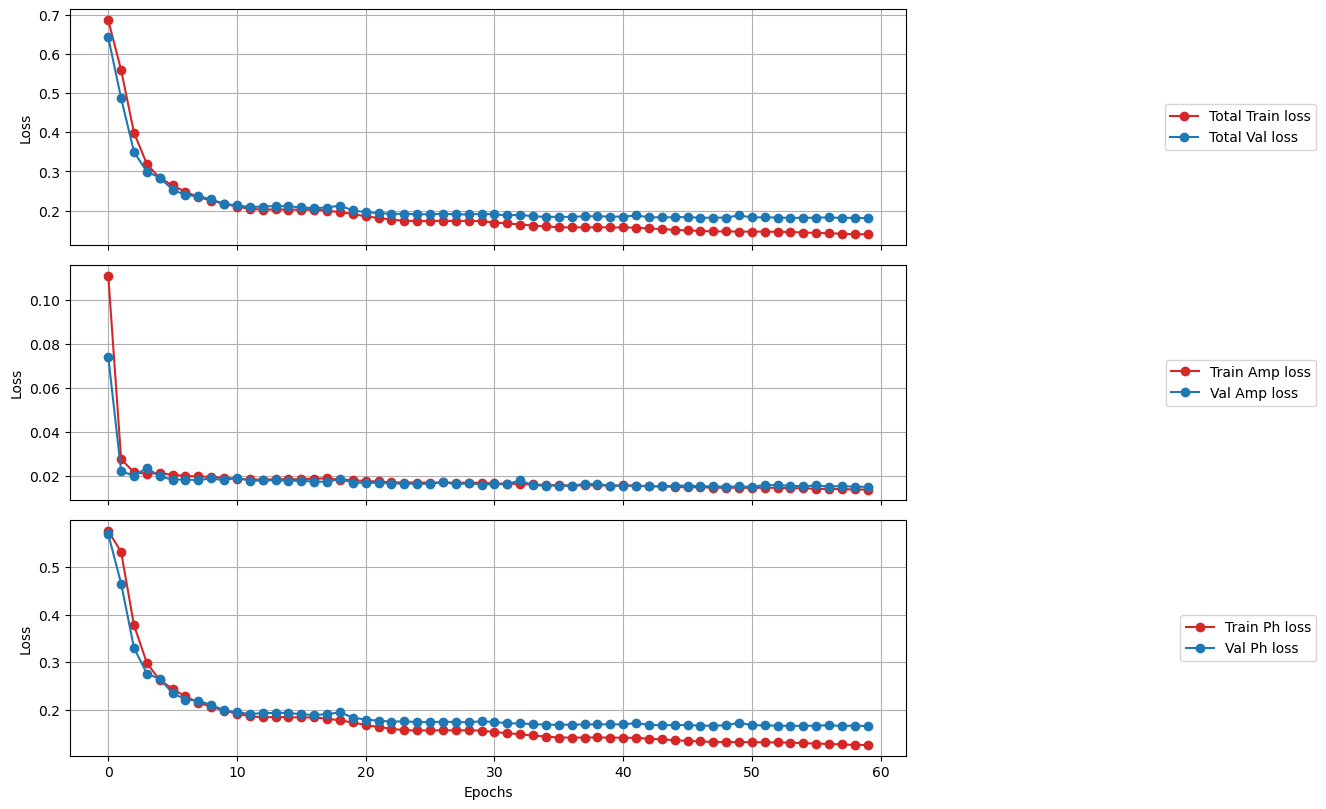

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                          0.221939
min_val_loss_mag                            0.075453
min_val_loss_phase                          0.146487
epoch_min_val_loss                              23.0
Name: 10, dtype: object


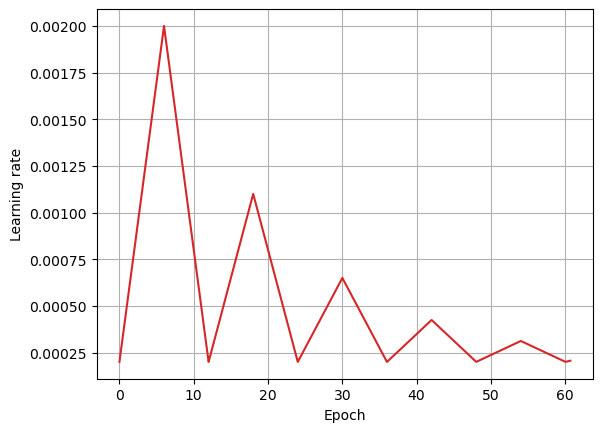

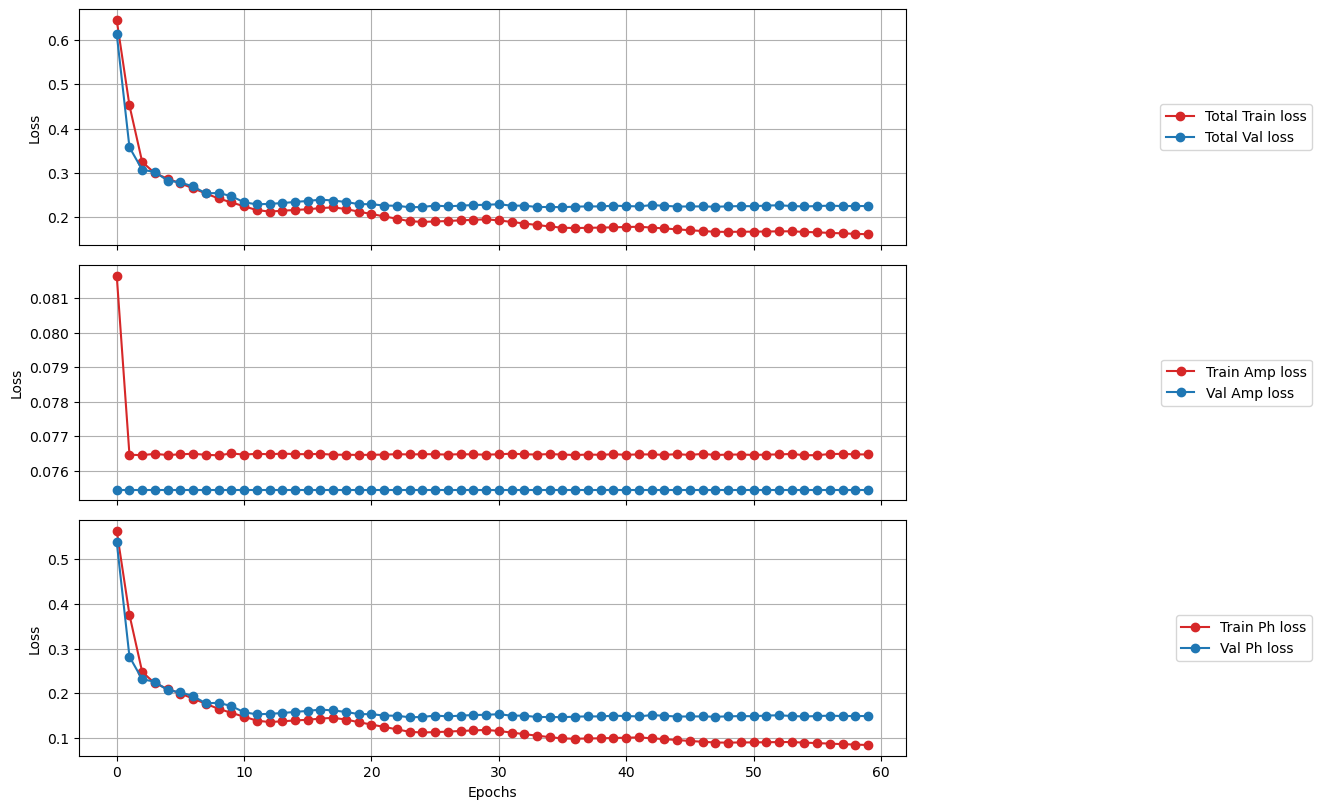

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.180745
min_val_loss_mag                            0.017167
min_val_loss_phase                          0.163578
epoch_min_val_loss                              47.0
Name: 11, dtype: object


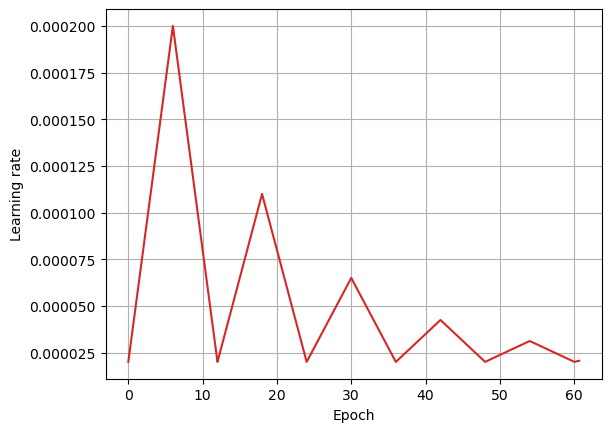

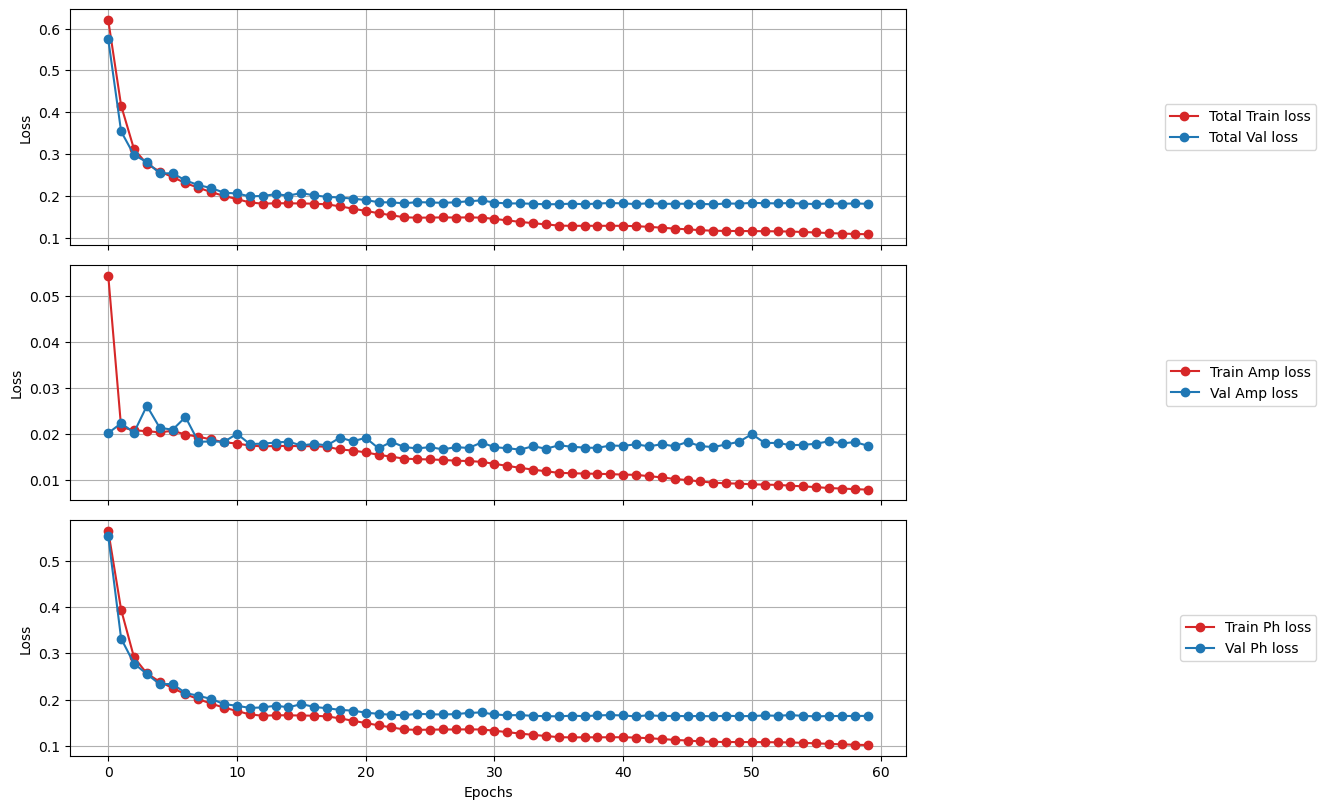

In [9]:
scanner.plot_all_training_history()

Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                     0.001
min_val_loss_total                         0.520122
min_val_loss_mag                                0.0
min_val_loss_phase                         0.520122
epoch_min_val_loss                              1.0
Name: 0, dtype: object


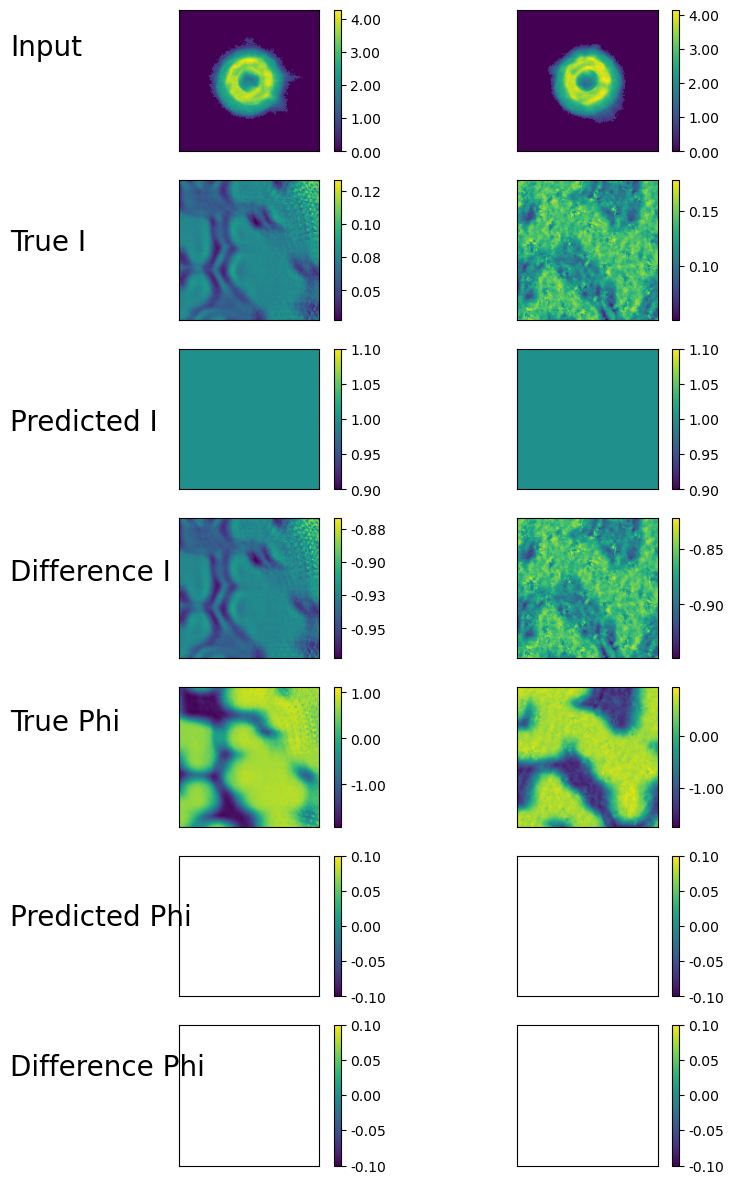

Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                    0.0001
min_val_loss_total                         0.194801
min_val_loss_mag                                0.0
min_val_loss_phase                         0.194801
epoch_min_val_loss                             59.0
Name: 1, dtype: object


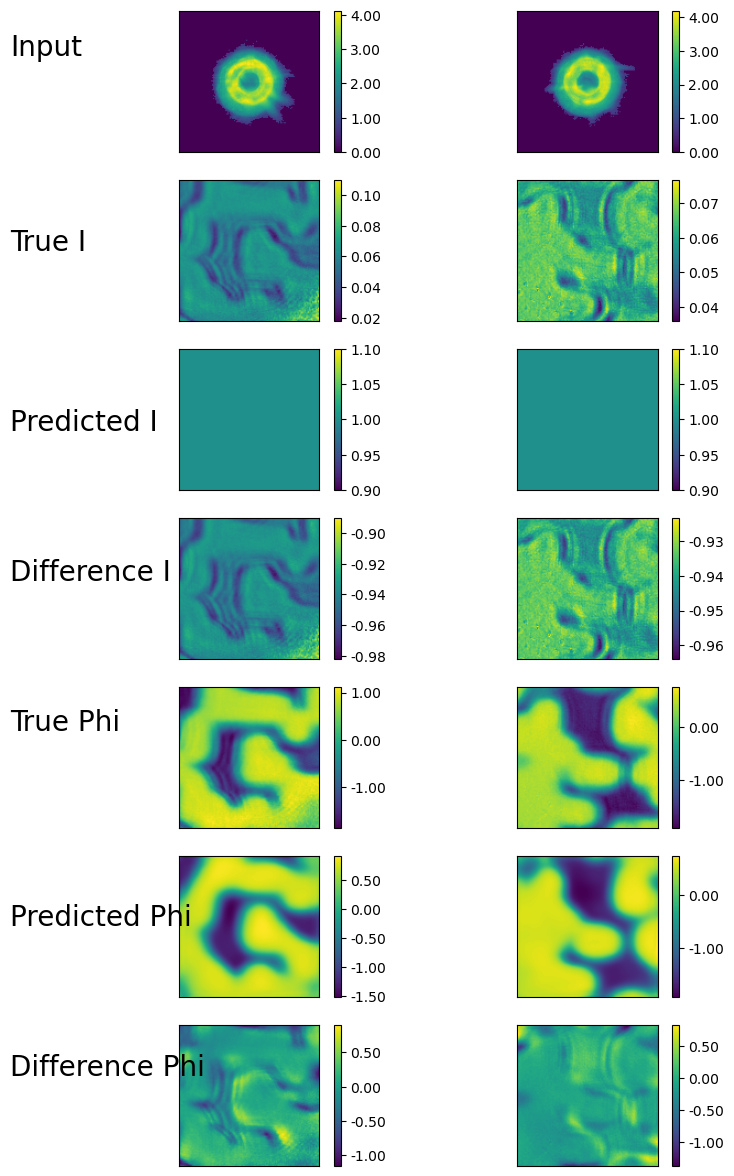

Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                     0.001
min_val_loss_total                         0.159438
min_val_loss_mag                                0.0
min_val_loss_phase                         0.159438
epoch_min_val_loss                             46.0
Name: 2, dtype: object


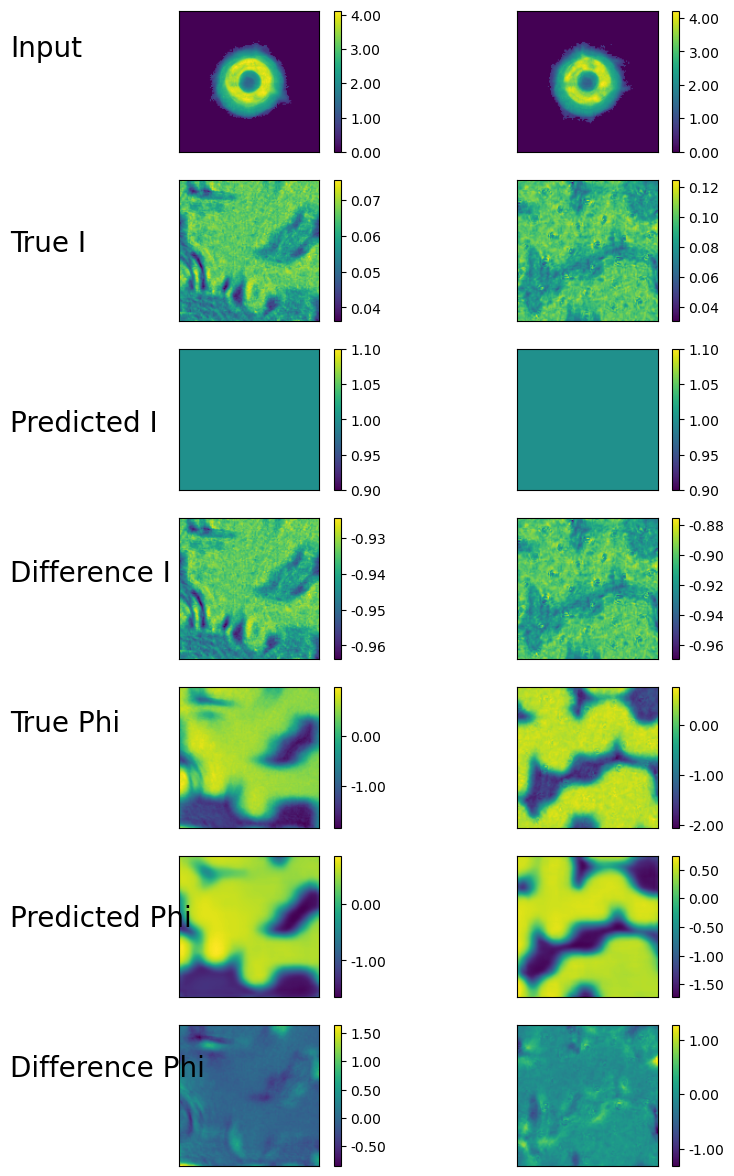

Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                    0.0001
min_val_loss_total                         0.184519
min_val_loss_mag                                0.0
min_val_loss_phase                         0.184519
epoch_min_val_loss                             59.0
Name: 3, dtype: object


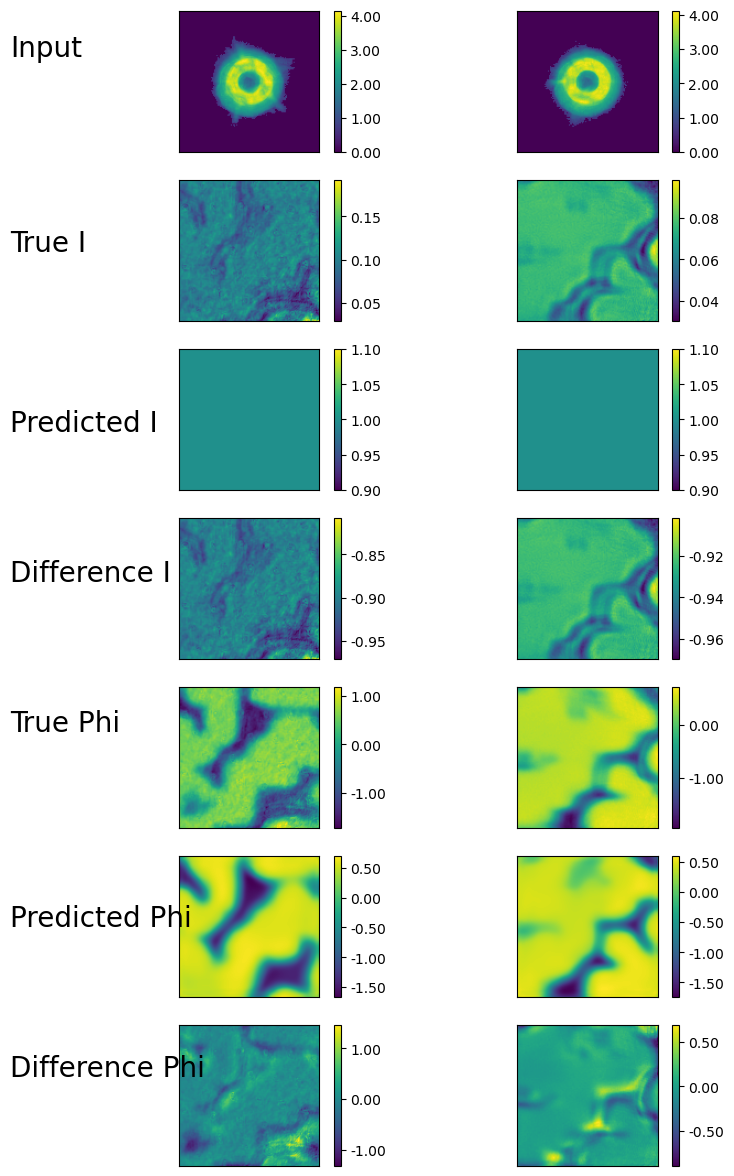

Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.353631
min_val_loss_mag                             0.07597
min_val_loss_phase                          0.277661
epoch_min_val_loss                              51.0
Name: 4, dtype: object


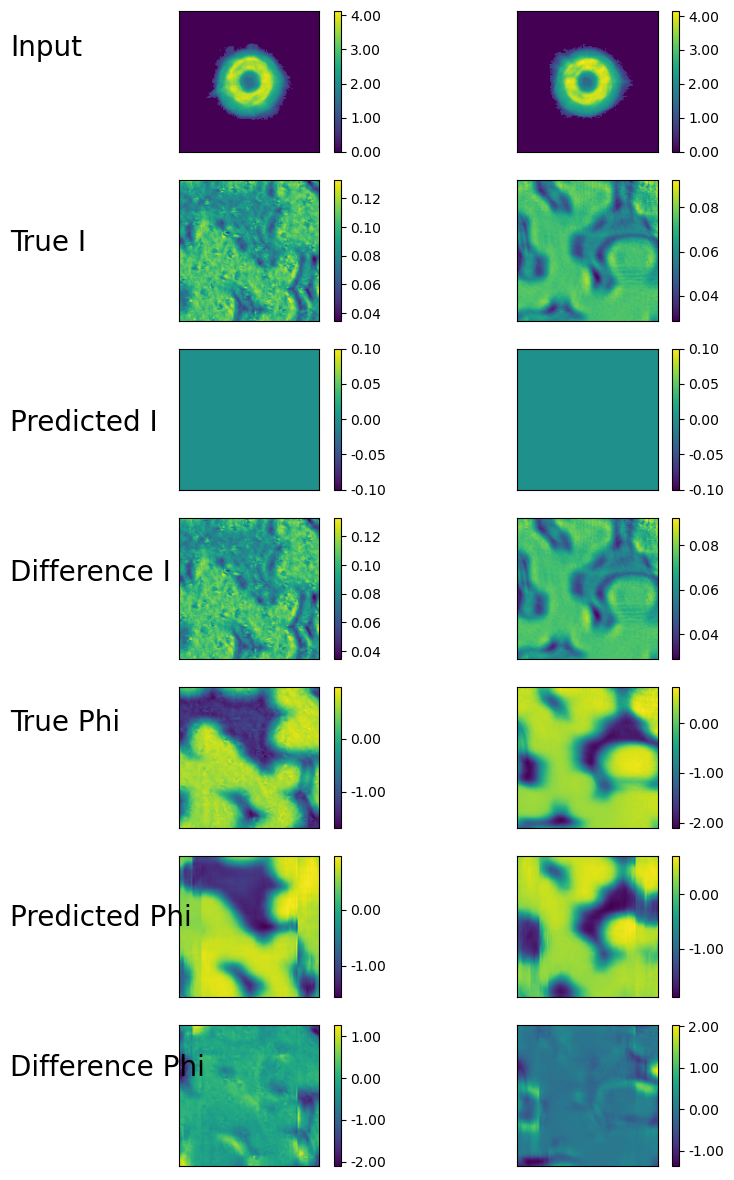

Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.339804
min_val_loss_mag                            0.018648
min_val_loss_phase                          0.321156
epoch_min_val_loss                              57.0
Name: 5, dtype: object


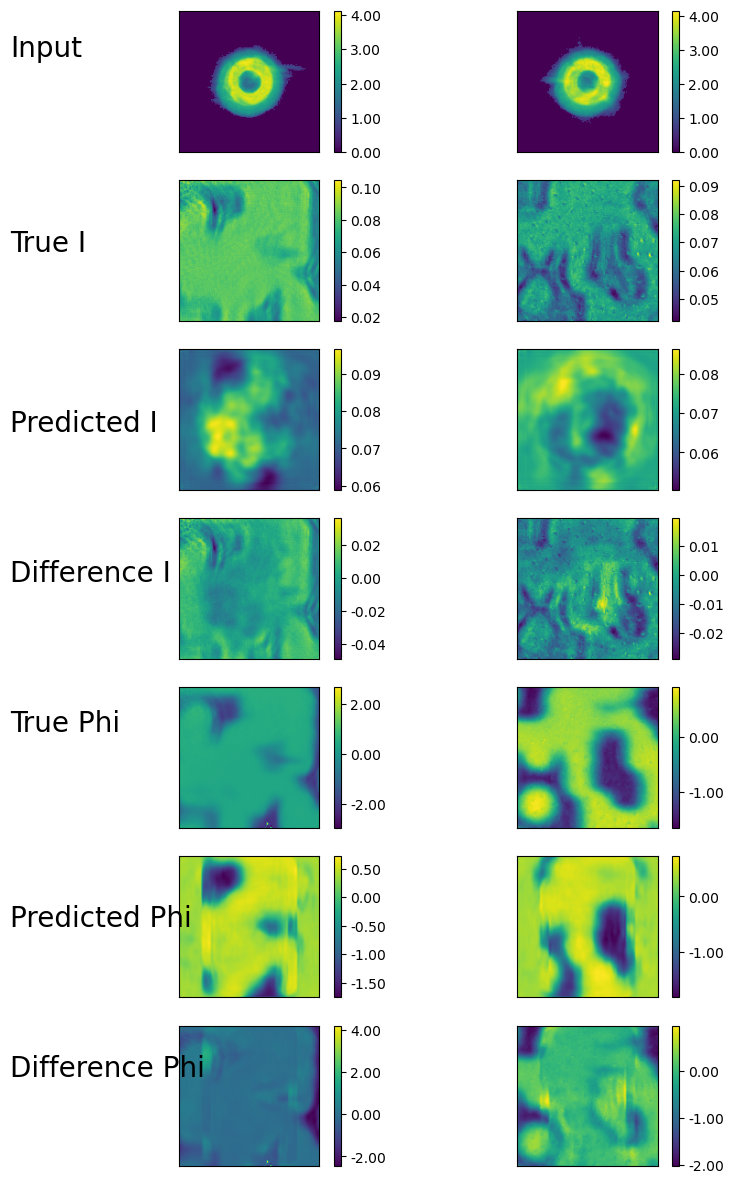

Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                          0.278894
min_val_loss_mag                            0.013709
min_val_loss_phase                          0.265185
epoch_min_val_loss                              35.0
Name: 6, dtype: object


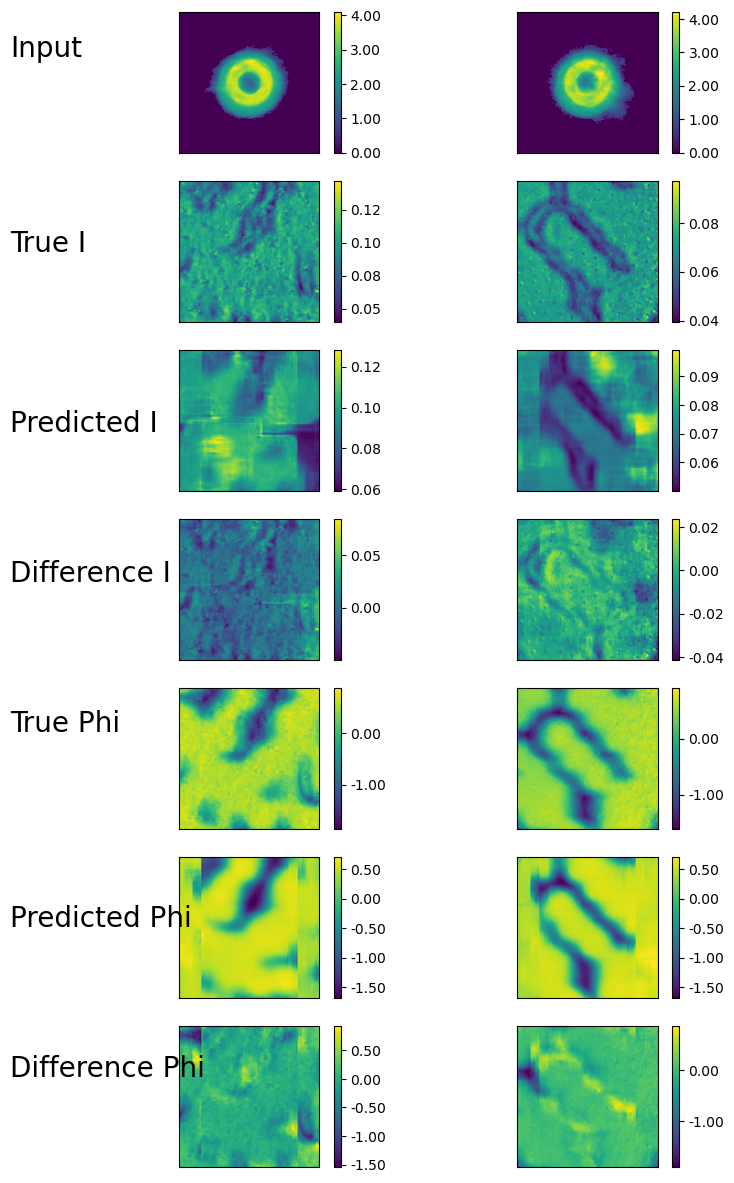

Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.324122
min_val_loss_mag                            0.016056
min_val_loss_phase                          0.308066
epoch_min_val_loss                              59.0
Name: 7, dtype: object


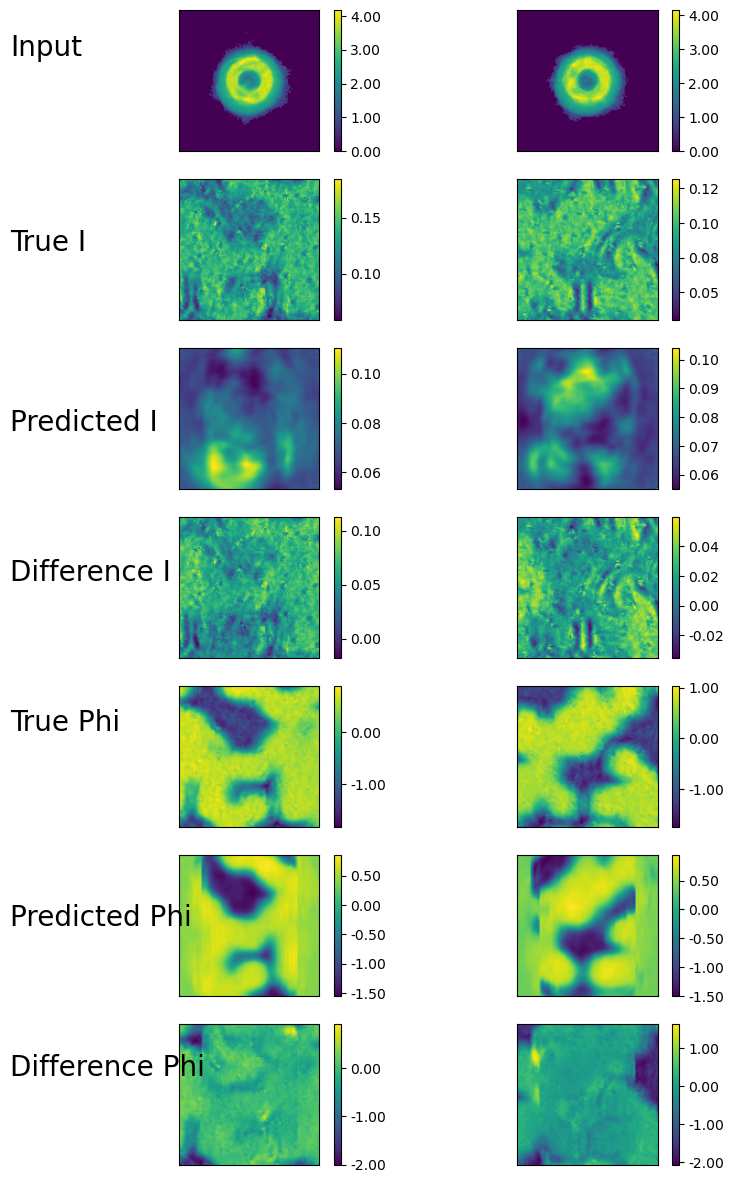

Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.161955
min_val_loss_mag                            0.013391
min_val_loss_phase                          0.148564
epoch_min_val_loss                              36.0
Name: 8, dtype: object


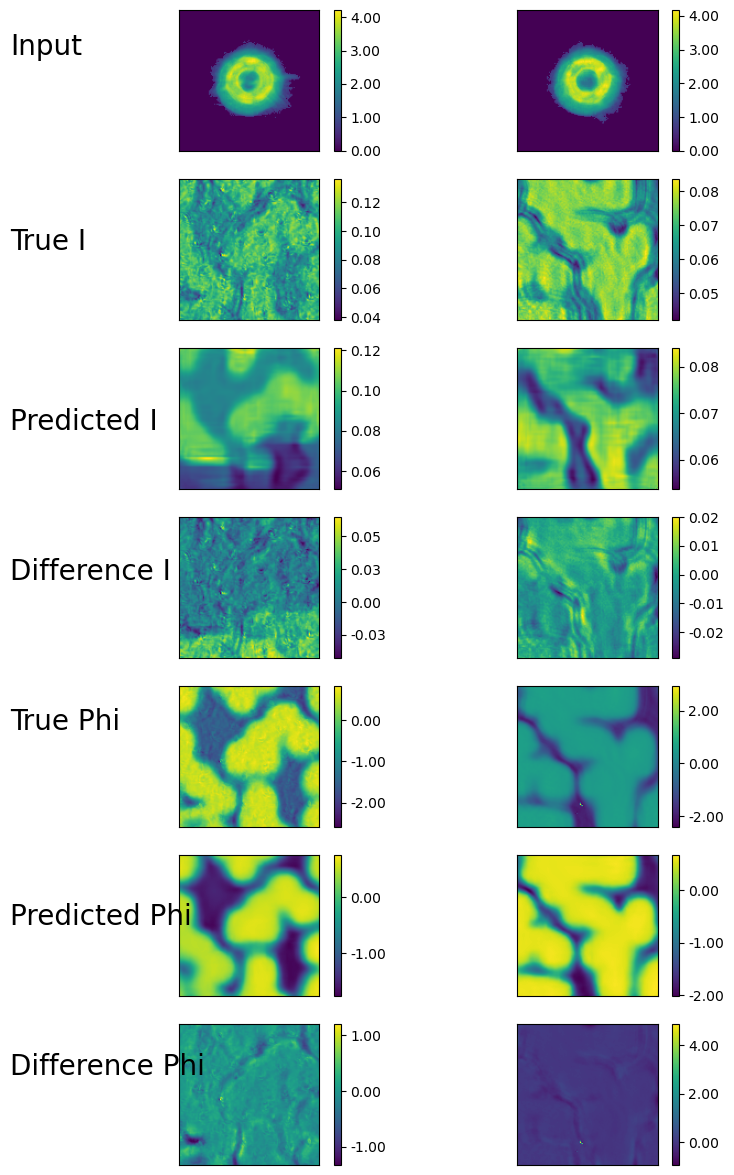

Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.180364
min_val_loss_mag                            0.015005
min_val_loss_phase                          0.165359
epoch_min_val_loss                              59.0
Name: 9, dtype: object


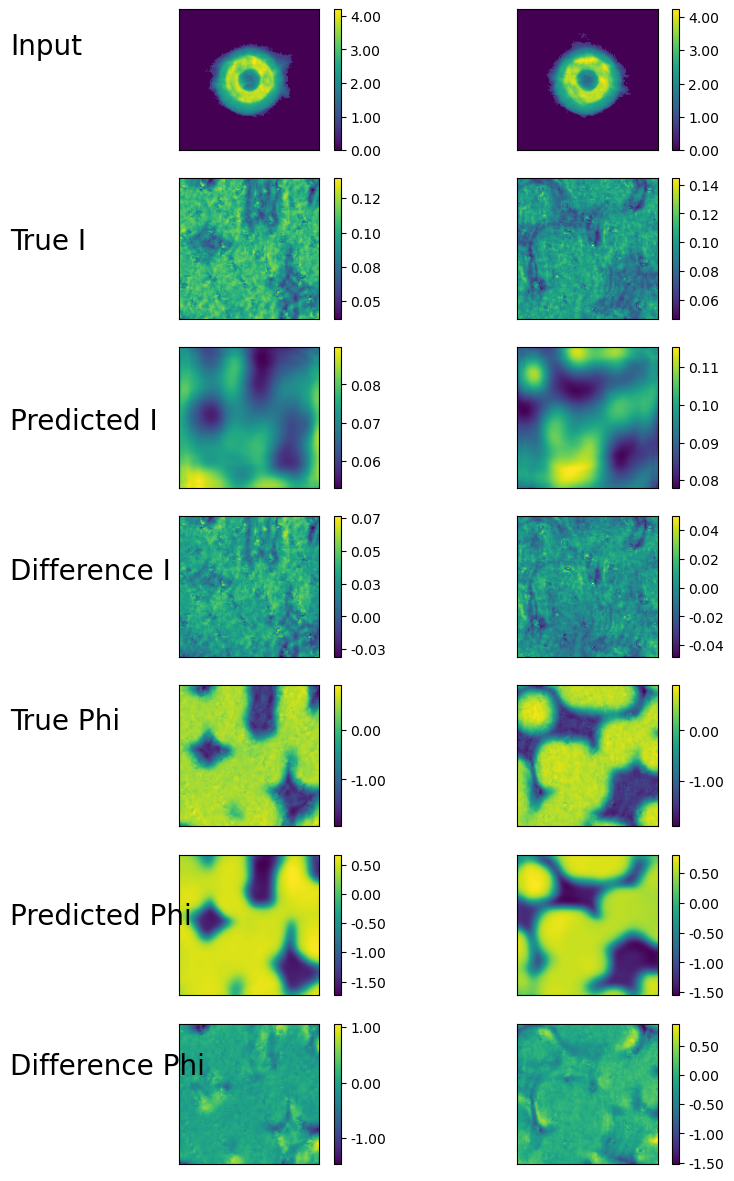

Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                          0.221939
min_val_loss_mag                            0.075453
min_val_loss_phase                          0.146487
epoch_min_val_loss                              23.0
Name: 10, dtype: object


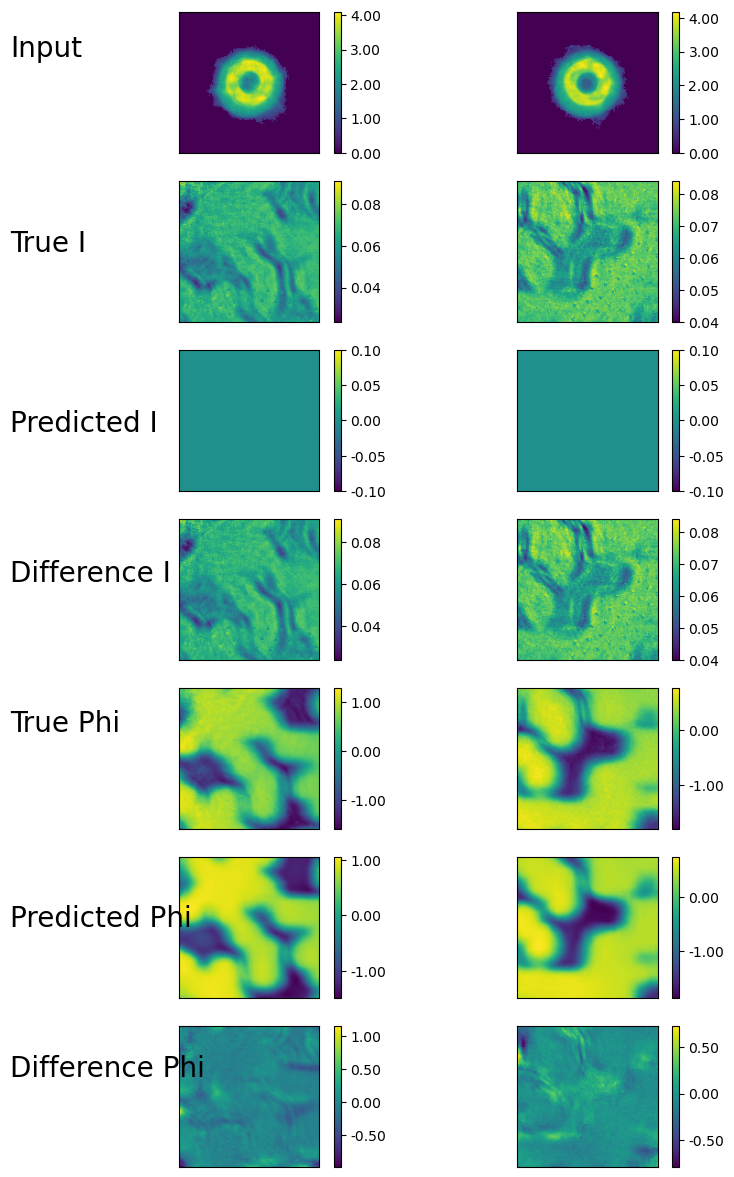

Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.180745
min_val_loss_mag                            0.017167
min_val_loss_phase                          0.163578
epoch_min_val_loss                              47.0
Name: 11, dtype: object


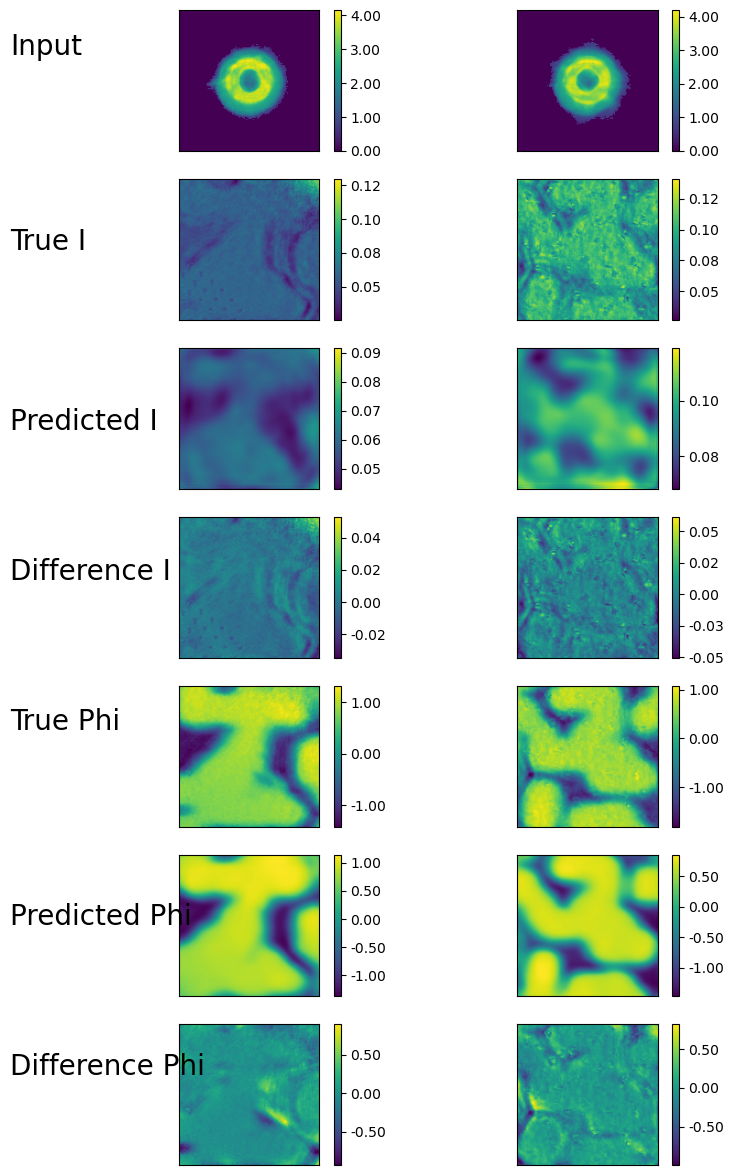

In [11]:
scanner.run_testing_for_all((0, 1))